# Applied Mechanisms and Big Data
### Assignment 1: wifi
##### Ysbrand Galama, 10262067
##### Koen Keune, 10003527



## 0.1

In [1]:
%pylab inline
from matplotlib.patches import Ellipse
random.seed(1)

Populating the interactive namespace from numpy and matplotlib


## 0.2

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

### a

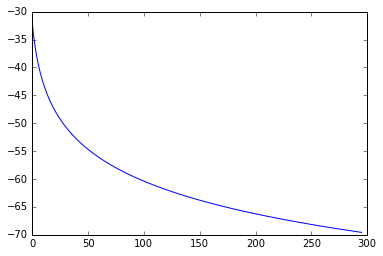

In [2]:
Pt,c,f = 0, 299792458, 2.4e9

r = arange(0.4,30,0.1)

Pr = Pt + 20 * log10( c / ( 4*pi*f*r) )

plot(Pr)

### b

\begin{align}
P_r &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
\frac{P_r - P_t} { 20} &= ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
10 ^ { \frac{P_r - P_t} { 20} } &= \frac{c}{4\pi f r} \\
10 ^ { \frac{P_r - P_t} { 20} } \frac{4\pi f}{c} &= \frac{1}{r} \\
r &= \frac{c}{4\pi f} 10^{ (P_t - P_r) / -20}
\end{align}

### c

In [3]:
def friis_i(Pr,Pt=0):
    return c/(4*pi*f) * 10**((Pt - Pr)/-20)

print( friis_i(-30) - friis_i(-31) )

print( friis_i(-60) - friis_i(-61) )

3.4184176042559257e-05
1.0809985623064794e-06


### d
As seen from the results of (c), the more negative the signal strength, the smaller the error becomes. This is intuatively correct, as the result of $P_t-P_r$ becomes larger, ten to the power of negative this number becomes a smaller number. It can also be seen from the plot of (a), as the slope gets flatter, the bigger the distance.

## 0.3
### e

As seen in this plot, the circles don't actually overlap on the
means, however, the overlap will be somewhere inside the margins of the uncertenties


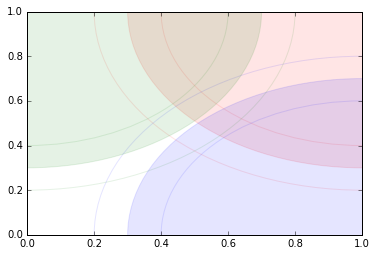

In [4]:
# 3 points with ( (x,y), distance, uncertanty, colour)
ps = [ ( (1,1), 0.7, 0.1, 'r'), ( (1,0), 0.7, 0.1, 'b'), ( (0,1), 0.7, 0.1, 'g') ]

ax = gcf().gca()
for p in ps:
    ax.add_artist(Circle( p[0], p[1], color=p[3], alpha=0.1))
    ax.add_artist(Circle( p[0], p[1]-p[2], color=p[3], alpha=0.1, fill=False))
    ax.add_artist(Circle( p[0], p[1]+p[2], color=p[3], alpha=0.1, fill=False))

print("As seen in this plot, the circles don't actually overlap on the\n\
means, however, the overlap will be somewhere inside the margins of the uncertenties")

### f

\begin{align}
P_r^i(x,y) &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) + 20 \times ^{10}\log \frac1r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) + 20 \times ^{10}\log \frac1r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log \sqrt{ (x-x_i)^2 + (y-y_i)^2 + Z^2) } \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 10 \times ^{10}\log \left( (x-x_i)^2 + (y-y_i)^2 + Z^2) \right) 
\end{align}

### g

The shown distribution has a mean of ~0 and a std of ~1


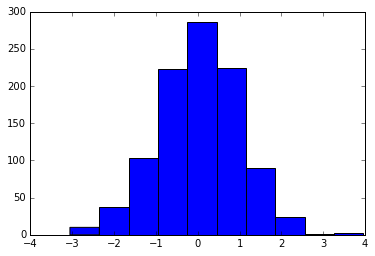

In [5]:
Z = 2
x,y = 20,0
xi,yi = 0,0
Pt = 0

packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "The shown distribution has a mean of ~0 and a std of ~1")

Underestimating the noise increases the std of the pull distribution.
 Overestimating on the contrairy reduces the std. Mean stays the same in both occations


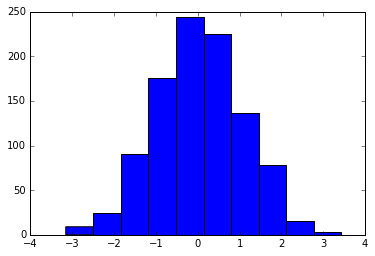

In [6]:
##h

packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "Underestimating the noise increases the std of the pull distribution.\n \
Overestimating on the contrairy reduces the std. Mean stays the same in both occations")

In this case the mean of the error is no longer zero.


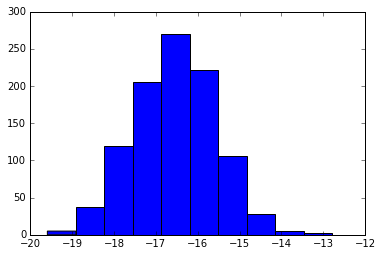

In [7]:
##i

packets = Pt+25*log10(c/(4*pi*f)) - 12.5 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

ax = hist( (packets - expect) / 1 )

print( "In this case the mean of the error is no longer zero.")


### j
Seen from these experiments, a pull distribution should have a mean of 0 and a std of your estimated std. Once this is the case, the model is correctly built for the data

## 0.3

### k

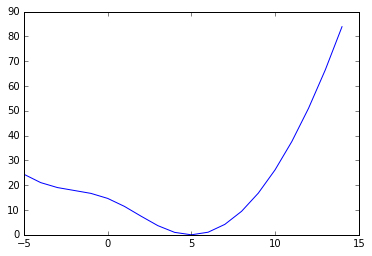

In [8]:
Pt = 0
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )

def Pri(x,y):
    return Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )

def chi2(x,y):
    return sum( (Si - Pri(x,y))**2/sig**2, axis=0 )

xrange = atleast_2d(arange(-5,15))
plot(xrange[0], chi2(xrange,5) )

As seen from these four figures with different noise, the minimum in no longer neccesary on
the correct position. It fluctuates slightly around the expected x-value of 5


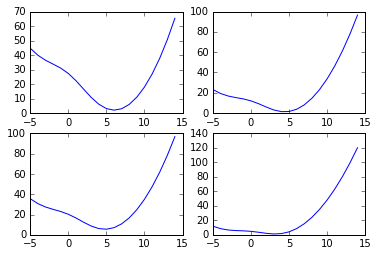

In [9]:
## l

for i in range(1,5):
    subplot(2,2,i)
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

    plot(xrange[0], chi2(xrange,5) )

print("As seen from these four figures with different noise, the minimum in no longer neccesary on\n\
the correct position. It fluctuates slightly around the expected x-value of 5")

In [10]:
## m
from scipy.optimize import minimize as spmin

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

print( spmin( chi2, 0, 5 ) )

      fun: 1.9565705882265478
 hess_inv: array([[ 0.48767162]])
      jac: array([ -7.48038292e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 5.20743254])


[ 4.92010254  4.84290103]
1.89718183049


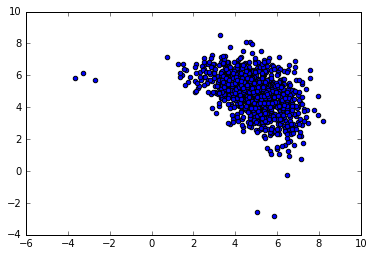

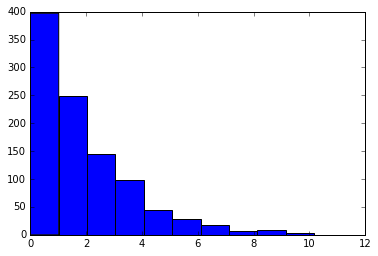

In [11]:
## n

def chi2_p(x):
    return chi2(x[0],x[1])

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) ) 
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
figure()
hist(array(chi2mins))
print(mean(coords,axis=0))
print(mean(array(chi2mins)))

### o

The plot of (n) shows a $\chi^2$ average of ~2, exactly the NDoF.

### p

As seen in the figure, the histogram of errors follows the pdf


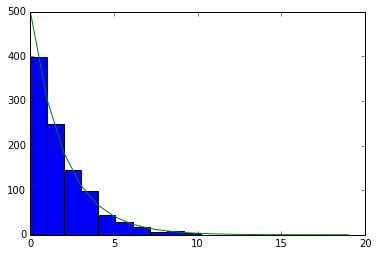

In [12]:
from scipy.stats import chi2 as pchi2

hist(array(chi2mins) )
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )

print("As seen in the figure, the histogram of errors follows the pdf")

[ 4.56257839  4.33343766]
7.41264962491
Now the average chi2 is no longer the NDoF, just as that the histogram no longer the curve follows.
The point-cloud is now also more distributed, giving a larger error in the estimation of the coordinates.
This because we now underestimate the error, thus making a small error 'correct'.


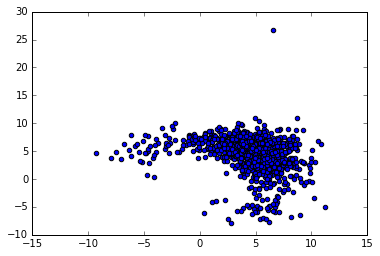

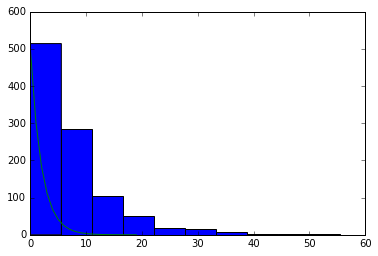

In [13]:
## q

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,2,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) )
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
figure()
hist(array(chi2mins))
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )
print(mean(coords,axis=0))
print(mean(array(chi2mins)))
print("Now the average chi2 is no longer the NDoF, just as that the histogram no longer the curve follows.\n\
The point-cloud is now also more distributed, giving a larger error in the estimation of the coordinates.\n\
This because we now underestimate the error, thus making a small error 'correct'.")

### r

As seen in the above, an std of 1 in stead of 2 made the error bigger with $2^2$. We would expect with ten DoF a $\chi^2$ average minimum of 10, when it is 40, there is probably an estimation error of the std of 2 in stead of 1.


## 0.5

### s
For convenience, $P_r^i(x_0,y_0)$ will be written as $P_r^i$.
\begin{align}
\chi^2(x,y) = & \sum_i \frac{(S_i - P_r^i(x,y) )^2}{\sigma_i^2} \\
\approx & \sum_i \frac{1}{\sigma_i^2}\left(S_i - P_r^i - \frac{\partial P_r^i}{\partial x} \times (x-x_0) - \frac{\partial P_r^i}{\partial y} \times (y-y_0) \right)^2 \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0) - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### t
\begin{align}
\chi^2(x,y) \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0)}_{=0} - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)}_{=0}
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### u
\begin{align}
\chi^2(x,y) \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \chi^2(x_0,y_0) + \sum_i \frac{1}{\sigma_i^2}\left( 
\left( \frac{\partial P_r^i}{\partial x} \Delta x \right)^2 + \left( \frac{\partial P_r^i}{\partial y} \Delta y \right)^2 +2 \frac{\partial P_r^i}{\partial x}\Delta x\frac{\partial P_r^i}{\partial y}\Delta y \right)
\end{align}


$\chi^2(\Delta x, \Delta y) \approx A + [\Delta x, \Delta y] \cdot \hat{B} \cdot [\Delta x, \Delta y]^T$

Where $A = \chi^2(x_0,y_0)$ and $\hat{B}=\left[\begin{array}{cc} 
\sum_i\frac{\frac{\partial P_r^i(x_0,y_0)}{\partial x}}{\sigma_i} & \sum_i\frac{\frac{\partial P_r^i(x_0,y_0)}{\partial x}}{\sigma_i} \\
\sum_i\frac{\frac{\partial P_r^i(x_0,y_0)}{\partial y}}{\sigma_i} & \sum_i\frac{\frac{\partial P_r^i(x_0,y_0)}{\partial y}}{\sigma_i}
\end{array}\right]$

### v
We can increase $\chi_{min}^2$ by one if we are at one $std$ of $\Delta x$, and idem for $\Delta y$.


### w

\begin{align}
\frac{\partial P_r^i(x_0,y_0)}{\partial x} &= \frac{20(x_0-x_i)}{\log(10)\left( (x_0-x_i)^2 + (y_0-y_i)^2 + Z^2 \right)} \\
\frac{\partial P_r^i(x_0,y_0)}{\partial y} &= \frac{20(y_0-y_i)}{\log(10)\left( (x_0-x_i)^2 + (y_0-y_i)^2 + Z^2 \right)}
\end{align}

      fun: 1.6283842902932224
 hess_inv: array([[ 0.830277  , -0.30574968],
       [-0.30574968,  0.59454924]])
      jac: array([  1.19209290e-06,   3.71038914e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 5.11761082,  6.67480666])


(0, 10)

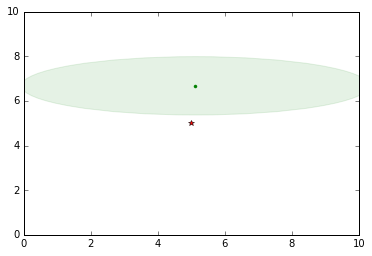

In [14]:
Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
minimum = spmin( chi2_p, array([0, 0]) )
x0,y0 = minimum.x
print(minimum)

Bhat11 = sum( 20 * (x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
Bhat22 = sum( 20 * (y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
varx,vary = 1/Bhat11,1/Bhat22
stdx,stdy = sqrt(varx),sqrt(vary)

ax = gcf().gca()
ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color='g', alpha=0.1))
plot(x,y,'r*')
plot(x0,y0,'g.')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)



C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in sqrt


(0, 10)

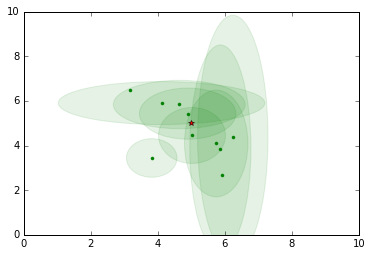

In [15]:
## x
ax = gcf().gca()
plot(x,y,'r*')

for i in range(10):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    minimum = spmin( chi2_p, array([0, 0]) )
    x0,y0 = minimum.x

    Bhat11 = sum( 20 * (x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    Bhat22 = sum( 20 * (y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    varx,vary = 1/Bhat11,1/Bhat22
    stdx,stdy = sqrt(varx),sqrt(vary)

    ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color='g', alpha=0.1))
    plot(x0,y0,'g.')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

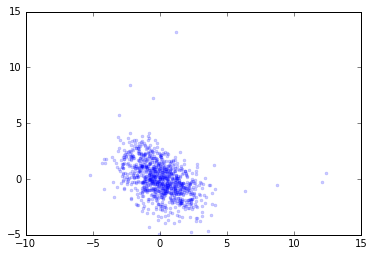

In [16]:
## y

coords = zeros((2,1000))
for i in range(1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    minimum = spmin( chi2_p, array([0, 0]) )
    #print(minimum)
    x0,y0 = minimum.x

    Bhat11 = sum( 20 * abs(x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    Bhat22 = sum( 20 * abs(y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    varx,vary = 1/Bhat11,1/Bhat22
    #print(varx,vary)
    stdx,stdy = sqrt(varx),sqrt(vary)
    #print((x-x0)/stdx,(y-y0)/stdy)
    coords[:,i] = (x-x0)/stdx,(y-y0)/stdy
plot(coords[0],coords[1],'.',alpha=0.2)

As seen in this figure, the mean of the points is about (0,0) and it looks like ~68% lies within a radius of 2. If the pull distribution would be different, it could mean our model is not a correct representation for the data. An example: we assumed with the Friis equation that there are no objects between the sender and receiver, which might not be the case. Or in our case, the estimated error is not a gaussian with $\sigma=2$.

### Z
This would mean our pull distribution would give an error of $2^2=4$ times as large.

### Bonus:
The ellipse could be rotated, as the axes of a two dimensional plane are arbitrary. This could be acieved by an Singular Value Decomposition. However, the ellipse can never be skewed, because a two dimensional plane always has ortogonal axes. The x and y location are independent of each other.

## 0.6

there are 73 packets
of which 30 positions are located
with a resolution of (0.354106,0.432511)


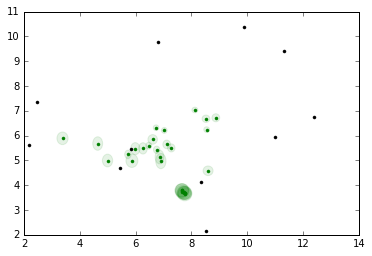

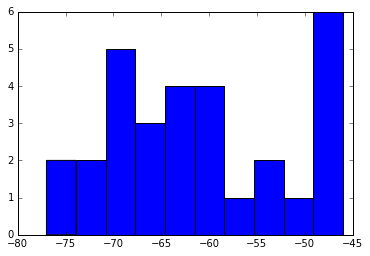

In [56]:
ROUTERS = {'Lima':(5.82,5.45),'Mike':(11.33,9.43),'Kilo':(12.39,6.77),'Oscar':(2.48,7.36),
           'Alpha':(8.53,2.16),'India':(2.18,5.61),'November':(8.34,4.13),'Hotel':(5.43,4.71),
           'Romeo':(10.99,5.94),'Quebec':(6.82,9.78),'Papa':(9.9,10.39)}

def plot_routers(ax=gcf().gca()):
    for coords in routers.values():
        ax.plot(coords[0],coords[1],'.k')

def plot_pos(positions,ax=gcf().gca()):
    for x0,y0,stdx,stdy in positions:
        ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color='g', alpha=0.1))
        ax.plot(x0,y0,'g.')
        
def chi2(x,p):
    # x = [x,y,Pt]
    # p = [Si,sig,xi,yi,c,f,Z]
    return sum( (p[0] - x[2] + 20 * log10(p[4]/(4*pi*p[5]) ) - 
                    10 * log10( (x[0] - p[2])**2 + (x[1] - p[3])**2 + p[6]**2 )
                )**2/p[1]**2, axis=0 )
def ferr(x0,y0,xi,yi,Z):
    Bhat11 = sum( 20 * abs(x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    Bhat22 = sum( 20 * abs(y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )
    varx,vary = 1/Bhat11,1/Bhat22
    return sqrt(varx),sqrt(vary)
    

def step_a(data):
    packets = {}
    for row in data:
        key = tuple(row[0:4])
        old = packets.get(key,[])
        old.append((row[6],int(row[7])))
        packets[key] = old
    return packets

def step_b(packets):
    positions = []
    Pt = []
    for i,(idx,packet) in enumerate(packets.items()):
        if len(packet) < 3:
            continue
        xi = array([ROUTERS[rec[0]][0] for rec in packet])
        yi = array([ROUTERS[rec[0]][1] for rec in packet])
        Si = array([rec[1] for rec in packet])
        param = [ Si, 1, xi, yi, 299792458, 2.4e9, 2]
        
        minimum = spmin( chi2, array([0, 0, 0]), param, bounds=[(None,None),(None,None),(max(Si),None)] )
        
        x0,y0 = minimum.x[:2]
        stdx,stdy = ferr(x0,y0,xi,yi,2)
        
        positions.append( (x0,y0,stdx,stdy) )
        Pt.append(minimum.x[2])
    return array(positions),array(Pt)

def main():
    f = open('UvA-wifitracking-exercise-prepped-data.csv','r')
    f.readline()
    data = [line.split(',') for line in f]
    f.close
    #print(data)
    packets = step_a(data)
    print('there are %d packets'%len(packets))
    positions,Pt = step_b(packets)
    print('of which %d positions are located'%positions.shape[0])
    plot_routers()
    plot_pos(positions)
    print('with a resolution of (%f,%f)'%tuple(mean(positions,axis=0)[2:4]) )
    figure(),hist(Pt)
    #print(packets)

main()